In [1]:
#Chargement des données
# Data
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import math
import joblib

# Graphics
import seaborn as sns 

from sklearn.experimental import enable_halving_search_cv # noqa

from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
# from sklearn.metrics import root_mean_squared_error

In [2]:
load_dotenv('BDD_URL.env')
BDD_URL = os.environ['BDD_URL']
engine = create_engine(BDD_URL)

SQL_filtre= """
SET search_path to principal;
SELECT *
from "filmview"
where 'Comedy' = ANY(string_to_array("genres", ','))
limit 10000;
"""
SQL= """
SET search_path to principal;
SELECT  "primaryTitle", "titleType", "isAdult", "startYear", "runtimeMinutes", "genres", "averageRating", "directors", "writers", "actor", "producer", "cinematographer", "composer", "editor", "production_designer", "self", "archive_footage", "archive_sound"
from "castview"
where  "runtimeMinutes" < 380 and "runtimeMinutes" Is NOT null and "averageRating" is NOT NULL and "genres" is NOT NULL and "startYear" is NOT NULL and "isAdult" is NOT NULL  and "directors" is NOT NULL and  "writers" is NOT NULL  and  "actor" is NOT NULL  and  "producer" is NOT NULL
ORDER BY "tconst" desc
limit 100000;
"""

#and "titleType" = 'movie' 

df = pd.read_sql(SQL, engine)
engine.dispose()
df

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound
0,Horrid Henry Knows It All,tvEpisode,0,2014,10,"Adventure,Animation,Comedy",8.2,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
1,Horrid Henry's Comic Caper,tvEpisode,0,2014,11,"Adventure,Animation,Comedy",8.8,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
2,6 Gunn,movie,0,2017,116,Drama,7.6,Kiran_Gawade,Kiran_Gawade,"Bhushan_Pradhan,Devadhar_Archit,Ganesh_Vasant_...","Abhishek_Jathar,Ujjwala_Gawde",Suresh_Deshmane,None,Rohita_More,None,None,None,None
3,Horrid Henry Delivers the Milk,tvEpisode,0,2012,10,"Adventure,Animation,Comedy",8.3,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
4,Horrid Henry Nothing but the Truth,tvEpisode,0,2012,10,"Adventure,Animation,Comedy",9.2,"Hilary_Audus,Kevin_Micallef","Francesca_Simon,Lucinda_Whiteley","Aidan_Cook,Lizzie_Waterworth,Sue_Elliott-Nicho...",Erica_Darby,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Kutukan Arwah Santet,movie,0,2012,81,Horror,6.8,Hanny_Mustofa,Hanny_Mustofa,"Ajeng,Duway,Erlando,Jenny_Cortez,Julia_Perez,O...",Shanker_R.S.,Halaston_Pakpahan,None,None,None,None,None,None
99996,Heavy Mental,movie,0,2013,100,"Drama,Mystery",5.4,Sebastian_Buttny,Sebastian_Buttny,"Greg_Stosch,Izabela_Nowakowska,Joanna_Szczepko...",Konrad_Wróblewski,Nicolas_Villegas,"Cezary_Kolodziej,Krzysztof_Kaliski",None,Agata_Trojak,None,None,None
99997,"Rayya, Cahaya di Atas Cahaya",movie,0,2012,100,Drama,7.8,Viva_Westi,"Emha_Ainun_Nadjib,Viva_Westi","Alex_Abbad,Tio_Pakusadewo,Titi_Rajo_Bintang,Ve...","Dewi_Umaya_Rachman,Sabrang_Mowo_Damar_Panuluh",Rahmat_Syaiful,Aksan_Sjuman,None,None,None,None,None
99998,Fallin' in Love,movie,0,2012,95,Drama,4.3,Findo_Purwono,Alim_Sudio,"Adly_Fayruz,Agesh_Palmer,Boy_William,Mikha_Tam...","Firman_Bintang,Rheina_Mariyana",Budi_Utomo,Marcell_Alexander_H.H.,None,None,None,None,None


In [3]:
df['titleType'].value_counts()

titleType
tvEpisode      42574
movie          33175
short          19020
tvMovie         3582
video           1275
tvShort          244
tvSpecial        115
videoGame          9
tvSeries           5
tvMiniSerie        1
Name: count, dtype: int64

Text(0, 0.5, 'Nombre de Film')

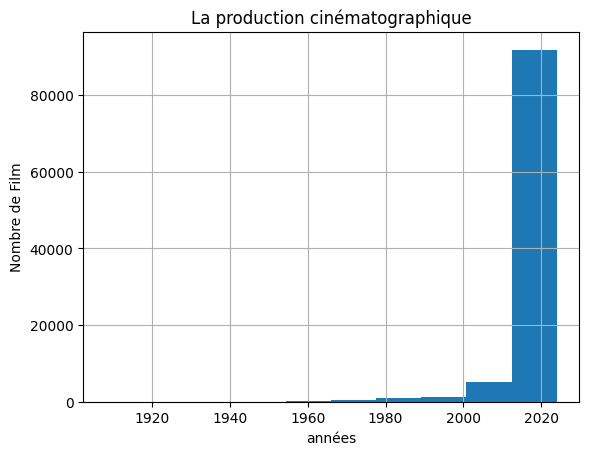

In [4]:
df['startYear'].hist()
plt.title('La production cinématographique')
plt.xlabel('années')
plt.ylabel('Nombre de Film')

Text(0, 0.5, 'Nombre de Film')

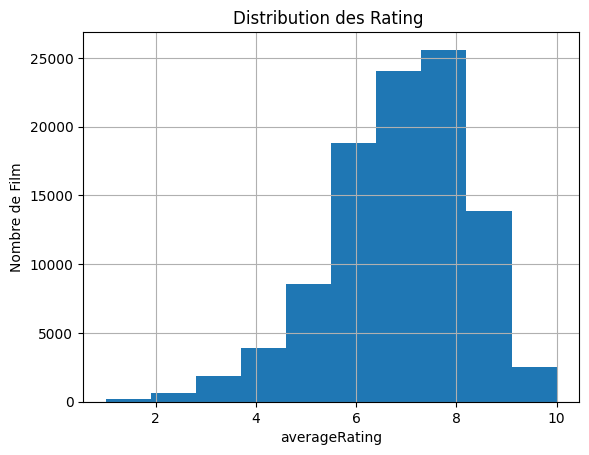

In [5]:
df['averageRating'].hist()
plt.title('Distribution des Rating ')
plt.xlabel('averageRating')
plt.ylabel('Nombre de Film')

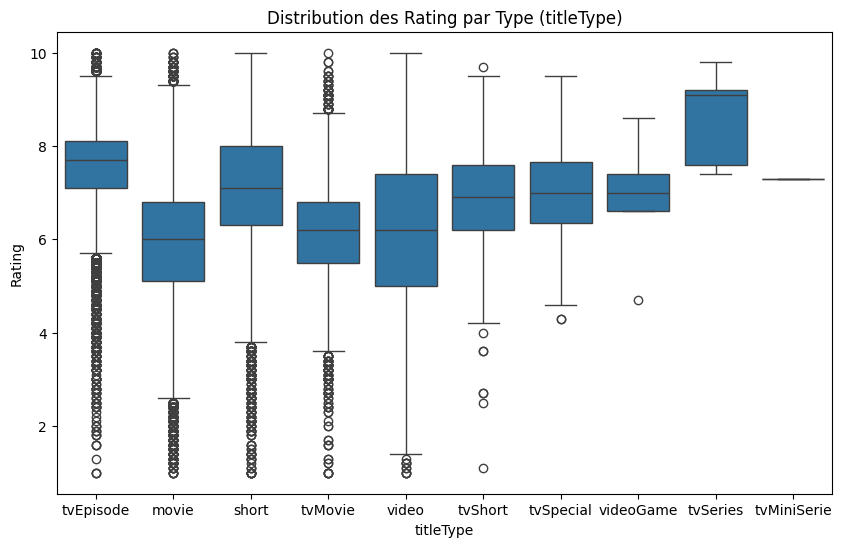

In [6]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='titleType', y='averageRating', data=df)
plt.title('Distribution des Rating par Type (titleType)')
plt.xlabel('titleType')
plt.ylabel('Rating')
plt.show()

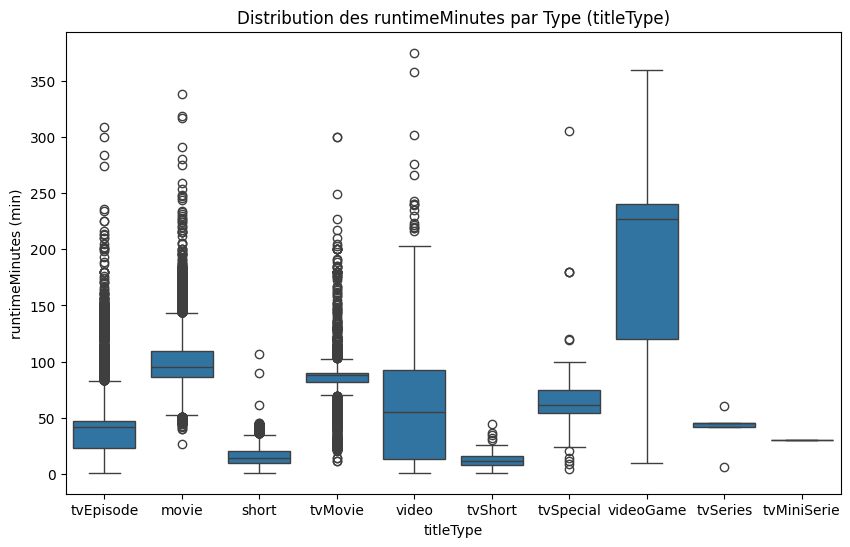

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='titleType', y='runtimeMinutes', data=df[df["runtimeMinutes"]<380])
plt.title('Distribution des runtimeMinutes par Type (titleType)')
plt.xlabel('titleType')
plt.ylabel('runtimeMinutes (min)')
plt.show()

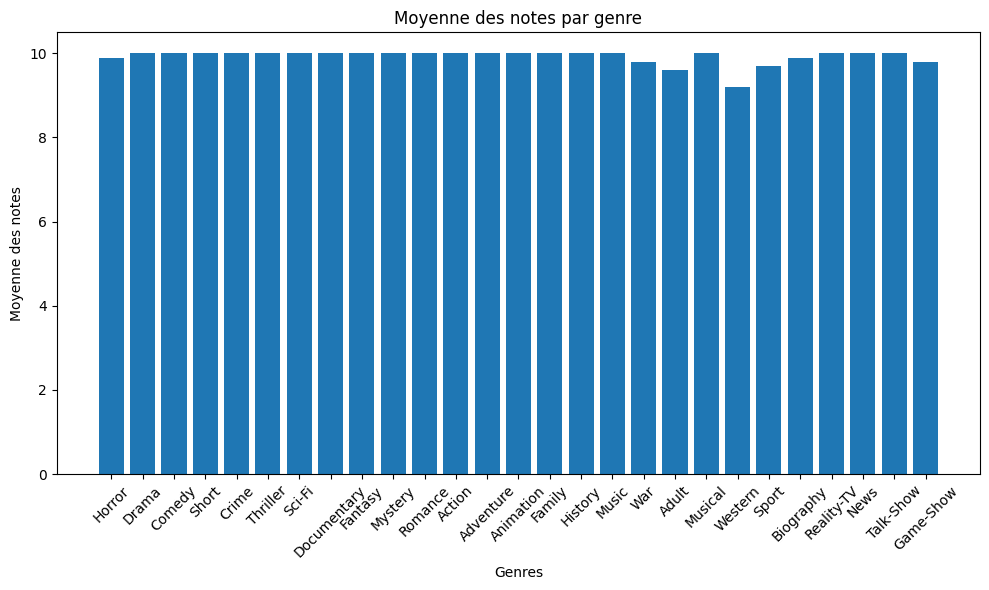

In [8]:
# Ce code affiche le rating par genre 
df['genres_split'] = df['genres'].str.split(',')


genres_ratings_df = pd.DataFrame(columns=['genres_split', 'averageRating'])
list=[]

for index, row in df.iterrows():

    for genre in row['genres_split']:

        list.append({'genres_split': genre.strip(), 'averageRating': row['averageRating']})



list = sorted(list, key=lambda x: x['averageRating'])

genres = [entry['genres_split'] for entry in list]
ratings = [entry['averageRating'] for entry in list]


plt.figure(figsize=(10, 6))
plt.bar(genres, ratings)


plt.xlabel('Genres')
plt.ylabel('Moyenne des notes')
plt.title('Moyenne des notes par genre')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges


plt.show()

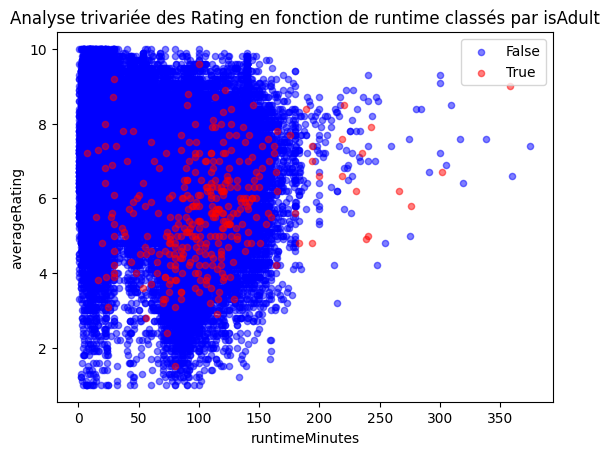

In [9]:
fig, ax = plt.subplots()

for key, group in df[df["runtimeMinutes"]<380].groupby('isAdult'):
    
    if key== 1:
        c='red'
    else:
        c='blue'
    group.plot.scatter(ax=ax, x='runtimeMinutes', y='averageRating', label=bool(key), c=c, alpha=0.5)
plt.title('Analyse trivariée des Rating en fonction de runtime classés par isAdult')
plt.show()

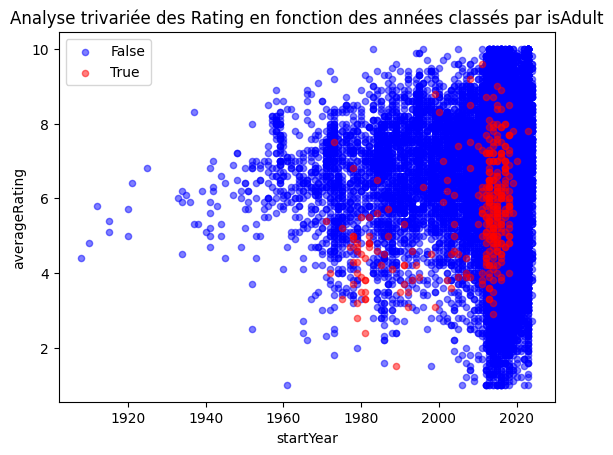

In [10]:
fig, ax = plt.subplots()

for key, group in df[df["runtimeMinutes"]<380].groupby('isAdult'):
    
    if key== 1:
        c='red'
    else:
        c='blue'
    group.plot.scatter(ax=ax, x='startYear', y='averageRating', label=bool(key), c=c, alpha=0.5)
plt.title('Analyse trivariée des Rating en fonction des années classés par isAdult')
plt.show()

In [11]:
def liste_en_texte(lst):
    if isinstance(lst, list):
        return ' '.join(lst)
    else:
        return lst

In [12]:
def cleanText(df):
    df.fillna('missing', inplace=True)
    df=df.str.replace(',', ' ')
    return df

In [13]:
columns_to_clean = ['primaryTitle', 'titleType', 'genres', 'directors', 'writers', 
                    'actor', 'producer', 'cinematographer', 'composer', 'editor', 
                    'production_designer', 'self', 'archive_footage', 'archive_sound']

for column in columns_to_clean:
    df[column] = cleanText(df[column])

In [14]:
df

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound,genres_split
0,Horrid Henry Knows It All,tvEpisode,0,2014,10,Adventure Animation Comedy,8.2,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
1,Horrid Henry's Comic Caper,tvEpisode,0,2014,11,Adventure Animation Comedy,8.8,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
2,6 Gunn,movie,0,2017,116,Drama,7.6,Kiran_Gawade,Kiran_Gawade,Bhushan_Pradhan Devadhar_Archit Ganesh_Vasant_...,Abhishek_Jathar Ujjwala_Gawde,Suresh_Deshmane,missing,Rohita_More,missing,missing,missing,missing,[Drama]
3,Horrid Henry Delivers the Milk,tvEpisode,0,2012,10,Adventure Animation Comedy,8.3,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
4,Horrid Henry Nothing but the Truth,tvEpisode,0,2012,10,Adventure Animation Comedy,9.2,Hilary_Audus Kevin_Micallef,Francesca_Simon Lucinda_Whiteley,Aidan_Cook Lizzie_Waterworth Sue_Elliott-Nicho...,Erica_Darby,missing,missing,missing,missing,missing,missing,missing,"[Adventure, Animation, Comedy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Kutukan Arwah Santet,movie,0,2012,81,Horror,6.8,Hanny_Mustofa,Hanny_Mustofa,Ajeng Duway Erlando Jenny_Cortez Julia_Perez O...,Shanker_R.S.,Halaston_Pakpahan,missing,missing,missing,missing,missing,missing,[Horror]
99996,Heavy Mental,movie,0,2013,100,Drama Mystery,5.4,Sebastian_Buttny,Sebastian_Buttny,Greg_Stosch Izabela_Nowakowska Joanna_Szczepko...,Konrad_Wróblewski,Nicolas_Villegas,Cezary_Kolodziej Krzysztof_Kaliski,missing,Agata_Trojak,missing,missing,missing,"[Drama, Mystery]"
99997,Rayya Cahaya di Atas Cahaya,movie,0,2012,100,Drama,7.8,Viva_Westi,Emha_Ainun_Nadjib Viva_Westi,Alex_Abbad Tio_Pakusadewo Titi_Rajo_Bintang Ve...,Dewi_Umaya_Rachman Sabrang_Mowo_Damar_Panuluh,Rahmat_Syaiful,Aksan_Sjuman,missing,missing,missing,missing,missing,[Drama]
99998,Fallin' in Love,movie,0,2012,95,Drama,4.3,Findo_Purwono,Alim_Sudio,Adly_Fayruz Agesh_Palmer Boy_William Mikha_Tam...,Firman_Bintang Rheina_Mariyana,Budi_Utomo,Marcell_Alexander_H.H.,missing,missing,missing,missing,missing,[Drama]


In [15]:
# Séparation des caractéristiques et de la cible
X = df.drop(columns=["averageRating"])
# X = df[['genres','actor']]
y = df["averageRating"]

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Définition des colonnes numériques, textuelles et de description
numeric_features = ['startYear', 'runtimeMinutes']
boolean_features = 'isAdult'
text_features = ['titleType']

In [17]:
def booleantrans (x):
    return x.astype(bool).values.reshape(-1, 1)

In [18]:
# Création des transformers pour les colonnes numériques, booléennes, textuelles et de description
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

boolean_transformer = FunctionTransformer(booleantrans) 

text_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Vect_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('vect', CountVectorizer(decode_error='ignore', analyzer='word')) #max_features=1000, analyzer="word"
])
tfidf_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('tf_idf', TfidfVectorizer(decode_error='ignore',analyzer='word')) #max_features=1000, sublinear_tf=True
])
# Création d'un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features),
        # ('text', text_transformer, text_features), # c'est titleType
        
        ('title', Vect_transformer, 'primaryTitle'), 
        
        ('genres', tfidf_transformer, 'genres'),
        ('producer', tfidf_transformer, 'producer'),       
        ('directors', tfidf_transformer, 'directors'),
        ('writers', tfidf_transformer, 'writers'),
        ('actor', tfidf_transformer, 'actor'),

        # ('cinematographer', tfidf_transformer, 'cinematographer'),
        # ('composer', tfidf_transformer, 'composer'),
        # ('editor', tfidf_transformer, 'editor'),
        # ('production_designer', tfidf_transformer, 'production_designer'),
        # ('selfy', tfidf_transformer, 'self'),
        # ('archive_footage', tfidf_transformer, 'archive_footage'),
        # ('archive_sound', tfidf_transformer, 'archive_sound')
        
        
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['startYear', 'runtimeMinutes']),
                                ('bool',
                                 FunctionTransformer(func=<function booleantrans at 0x0000023ACDAD1B20>),
                                 'isAdult'),
                                ('title',
                                 Pipeline(steps=[('vect',
                                                  CountVectorizer(decode_error='ignore'))]),
                                 'primaryTitle'),
                                ('genres',
                                 P...
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'producer'),
                                ('directors',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'directors'),
                                ('writers',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'writers'),
                                ('actor',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'actor')])

In [19]:
# Création des pipelines pour chaque modèle
pipelines = {
    # 'Linear Regression': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    # 'Ridge Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    # 'Lasso Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())]),
    # 'ElasticNet': Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())]),
    #  'Random Forest Regression': Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
    # 'Gradient Boosting Regression': Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())]),
    'SVR': Pipeline([('preprocessor', preprocessor), ('regressor', SVR())]),
}

# Paramètres pour GridSearchCV pour chaque modèle
parameters = {
    # 'Linear Regression': {'regressor__fit_intercept': [True,False]},
    # 'Ridge Regression': {'regressor__alpha': [0.1, 1.0, 5.0,10]},
    # 'Lasso Regression': {'regressor__alpha': [0.1, 1.0, 5.0,10]},
    # 'ElasticNet': {'regressor__alpha': [0.1, 1.0, 5.0,10], 'regressor__l1_ratio': [0.1, 0.5, 0.9]},
    #  'Random Forest Regression': {'regressor__n_estimators': [50,100], 'regressor__max_depth': [10, 20]},# None, 
    # 'Gradient Boosting Regression': {'regressor__n_estimators': [50,100], 'regressor__max_depth': [10, 20]},
    'SVR': {'regressor__kernel': ['linear', 'rbf'], 'regressor__C': [0.1, 1.0, 10.0]},
}

# Scoring : RMSE, R2 et MAE
scoring = {'RMSE': 'neg_root_mean_squared_error',
           'R2': 'r2',
           'MAE': 'neg_mean_absolute_error'}


In [20]:
def Grid(X_train, y_train, pipeline, parameters, cv=5):


  # Grid search
  grid = GridSearchCV(pipeline, parameters,  scoring=scoring, refit='RMSE', cv=cv, n_jobs =-1, verbose = 0)#, error_score='raise'

  # Fit
  grid.fit(X_train, y_train)

  # Scores and results
  best_score = grid.best_score_.round(4)
  best_params = grid.best_params_
  training_time = grid.cv_results_['mean_fit_time'].mean().round(4)

  # Output
  return({
      'best_score': best_score,
      'best_params': best_params,
      'training_time': training_time,
      'fitted_model': grid.best_estimator_
  })

In [21]:
def afficheResults (grid):
    model_name = grid['fitted_model'].named_steps['regressor'].__class__.__name__
    print(f"{model_name} training time: {grid['training_time']}")
    print(f"Best {model_name} parameters: {grid['best_params']}")
    print(f"Best {model_name} score: {-grid['best_score']}")
 
    
    

In [22]:
# Boucle sur les modèles pour ajuster avec GridSearchCV
models = {}

# Boucle sur les modèles pour ajuster avec GridSearchCV et évaluation
for model_name, pipeline in pipelines.items():
    print(f"\n..............{model_name}..............................")
    grid_search = Grid(X_train, y_train, pipeline, parameters[model_name], cv=5)
    afficheResults (grid_search)
    
    best_model = grid_search['fitted_model']
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    Rmse = round(math.sqrt(mse), 4)
    models[model_name] = [best_model,Rmse]
    print(f"{model_name} RMSE: {Rmse}")


..............SVR..............................


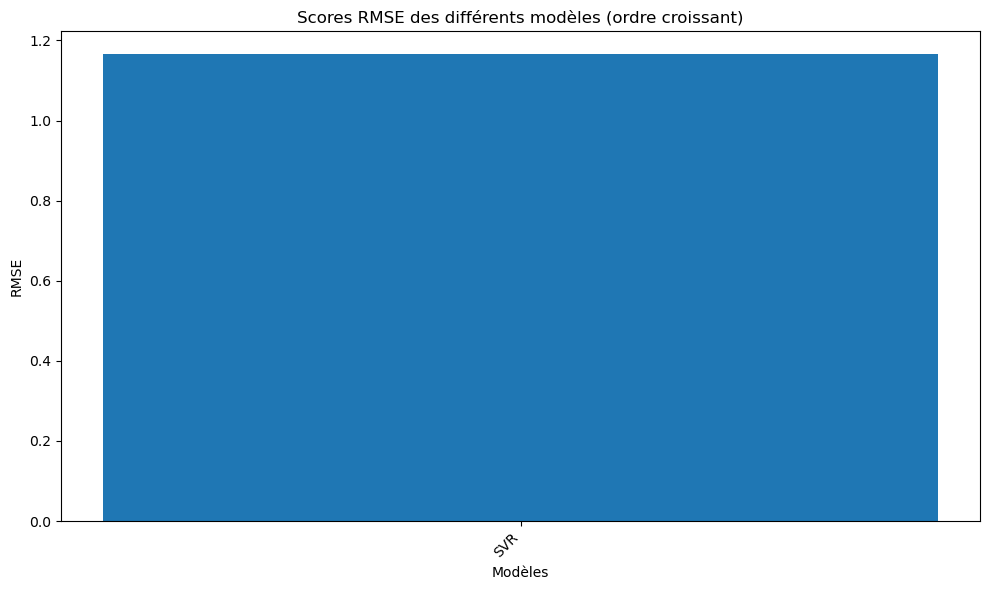

In [ ]:
# Trier les modèles par score RMSE croissant
sorted_models = sorted(models.items(), key=lambda x: x[1][1])

# Extraire les noms des modèles et les scores RMSE triés
model_names = [model[0] for model in sorted_models]
rmse_scores = [model[1][1] for model in sorted_models]


# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_scores)
plt.xlabel('Modèles')
plt.ylabel('RMSE')
plt.title('Scores RMSE des différents modèles (ordre croissant)')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique des marges
plt.show()

Un simple test de prediction

In [ ]:
Modelename= 'SVR'
LEmodel=models[Modelename][0]

In [ ]:
simple=df.iloc[0:1]
simple

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound
0,6 Gunn,movie,0,2017,116,Drama,7.6,Kiran_Gawade,Kiran_Gawade,Bhushan_Pradhan Devadhar_Archit Ganesh_Vasant_...,Abhishek_Jathar Ujjwala_Gawde,Suresh_Deshmane,missing,Rohita_More,missing,missing,missing,missing


In [ ]:
LEmodel.predict(simple)

array([7.03472879])

Sauvegarder le modèle dans un fichier

In [ ]:
import pickle

# model est votre modèle entraîné
with open('model.pkl', 'wb') as f:
    pickle.dump(LEmodel, f)

['SVR.pkl']